In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\Python projects\dataset/Dataset - Heart_Disease_Prediction (1) (2).csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,Max HR,FBS over 120,Heart Disease
0,65,1,4,130,322,109,0,Presence
1,51,0,3,115,564,160,0,Absence
2,59,1,2,124,261,141,0,Presence
3,48,1,4,128,263,105,0,Absence
4,73,0,2,120,269,121,0,Absence


In [4]:
df.dtypes

Age                 int64
Sex                 int64
Chest pain type     int64
BP                  int64
Cholesterol         int64
Max HR              int64
FBS over 120        int64
Heart Disease      object
dtype: object

In [5]:
def extract_cat_num(df):   
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [6]:
cat_col,num_col=extract_cat_num(df)

In [7]:
cat_col

['Heart Disease']

In [8]:
num_col

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'Max HR',
 'FBS over 120']

In [9]:
for col in cat_col:
    print('{} has {} values'.format(col,df[col].unique()))
    print('\n')

Heart Disease has ['Presence' 'Absence'] values




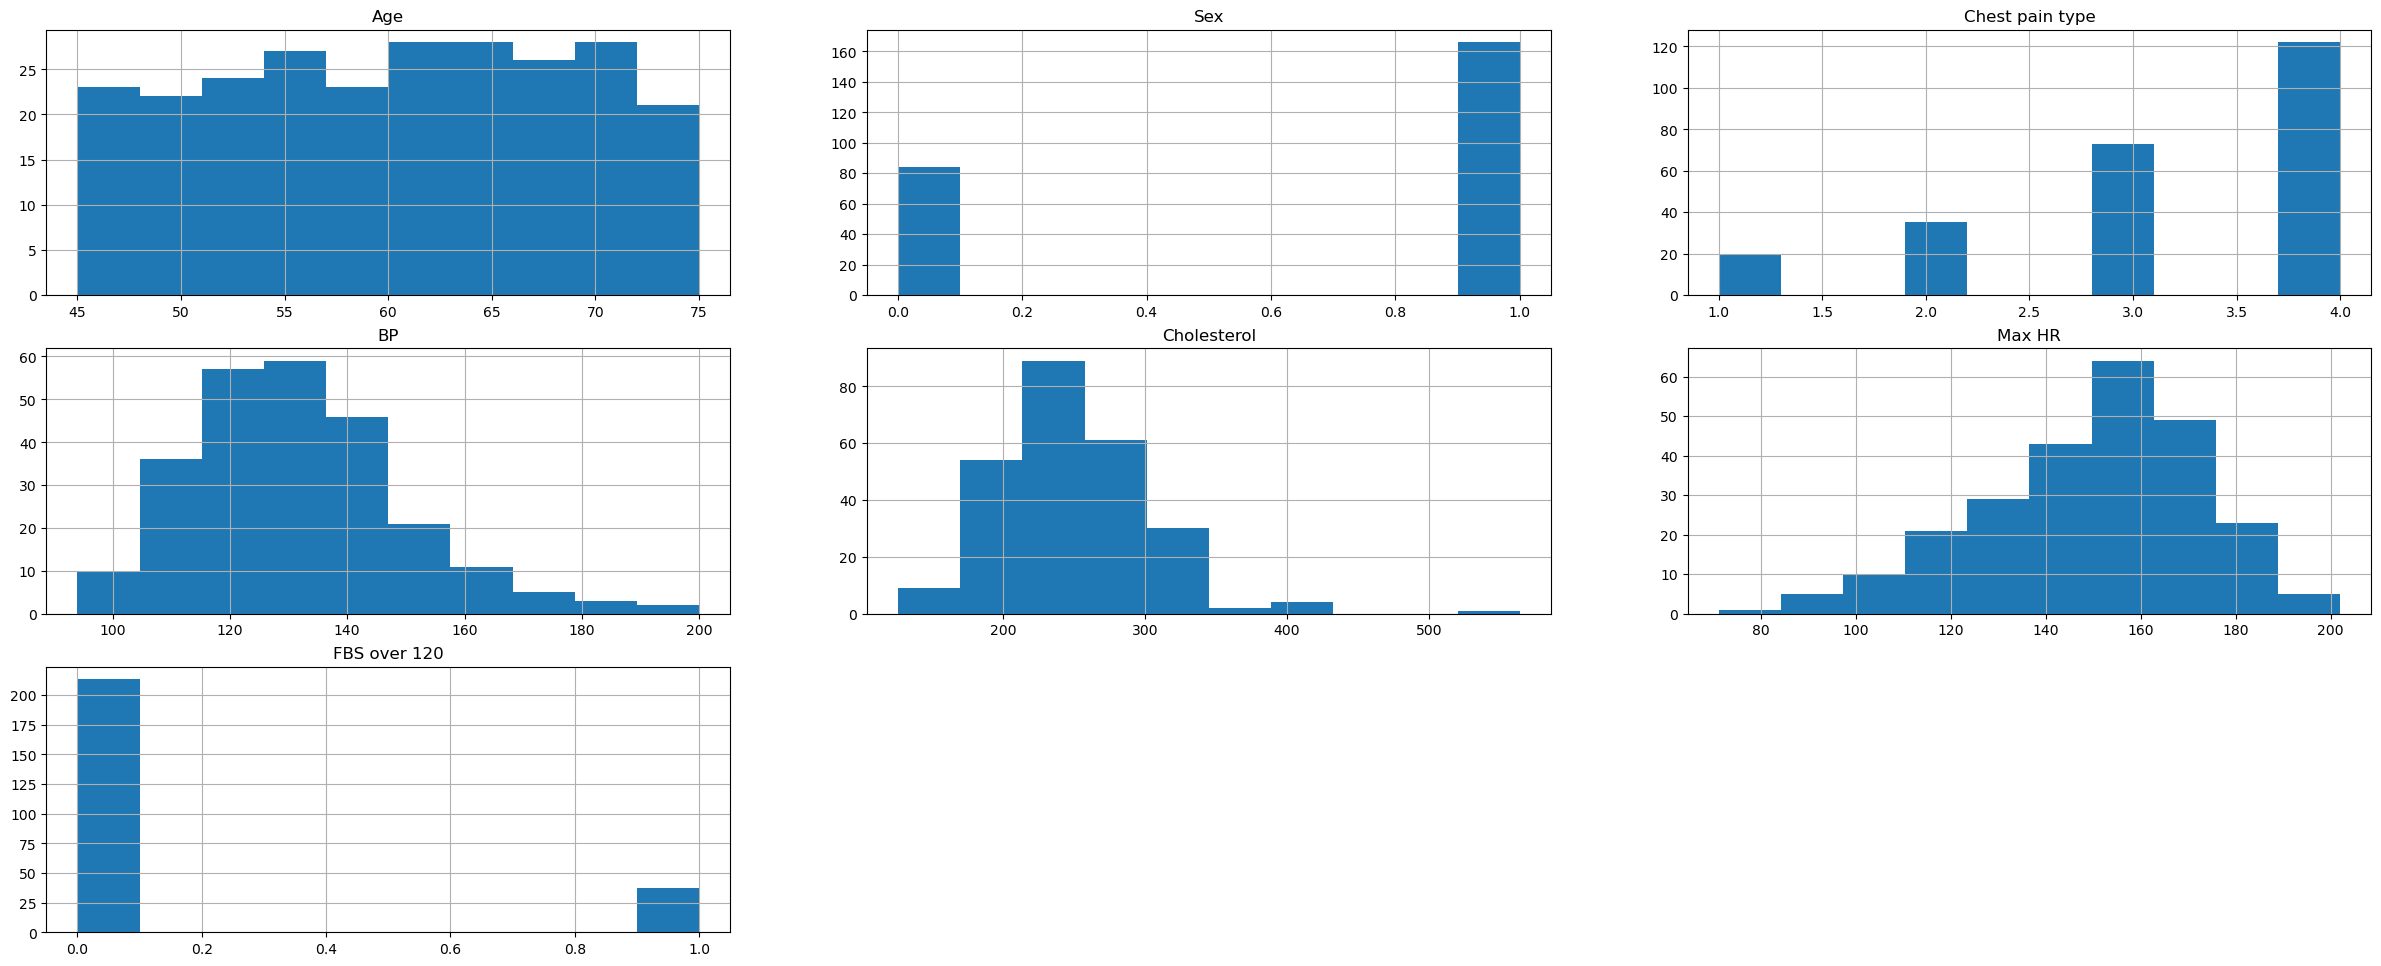

In [10]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)#return distribution of each feature

C:\Users\Jayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

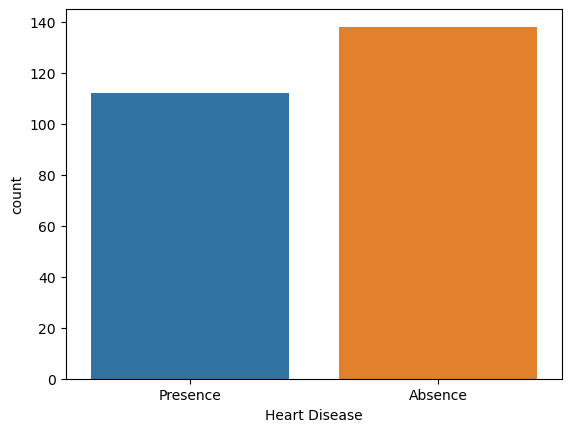

In [16]:
sns.countplot(df['Heart Disease'])

<AxesSubplot:>

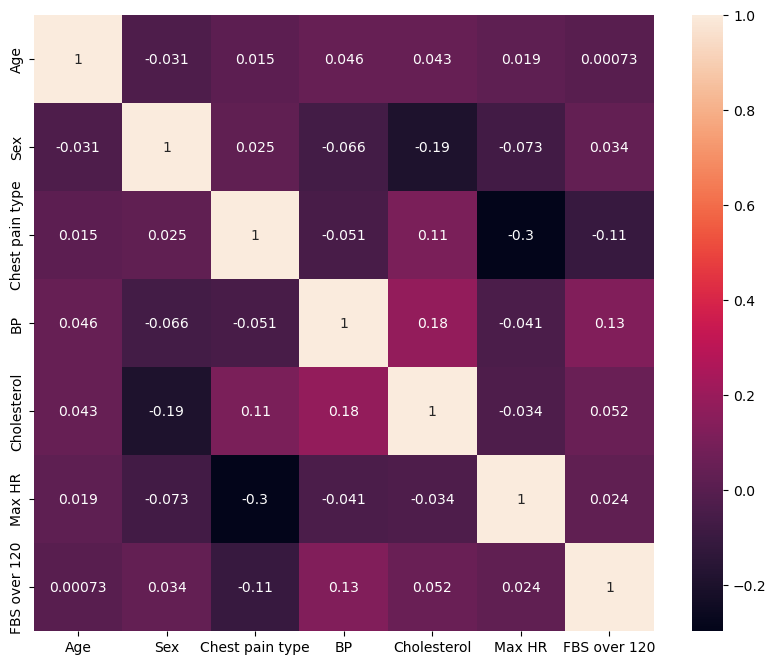

In [17]:
plt.figure(figsize=(10,8))
df.corr()
sns.heatmap(df.corr(),annot=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [21]:
data = df.copy()

In [22]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [23]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,Max HR,FBS over 120,Heart Disease
0,65,1,4,130,322,109,0,1
1,51,0,3,115,564,160,0,0
2,59,1,2,124,261,141,0,1
3,48,1,4,128,263,105,0,0
4,73,0,2,120,269,121,0,0


In [24]:
indep_col=[col for col in data.columns if col!='Heart Disease']
dep_col = 'Heart Disease'

In [25]:
X=data[indep_col]
Y=data[dep_col]

In [26]:
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,Max HR,FBS over 120
0,65,1,4,130,322,109,0
1,51,0,3,115,564,160,0
2,59,1,2,124,261,141,0
3,48,1,4,128,263,105,0
4,73,0,2,120,269,121,0


In [27]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.25)

In [68]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [69]:
model.fit(x_train,y_train)

GaussianNB()

In [70]:
model.score(x_test,y_test)

0.8412698412698413

In [71]:
test = [[58, 1, 2, 141, 297, 155, 0]]
a = model.predict(test)
if a[0]==0:
    print("Absence")
else:
    print("Presence")

Absence


C:\Users\Jayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
